In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Admission_Predict.csv')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
data['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
data = data.drop(columns='Serial No.')
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
y =[1 if each > 0.75 else 0 for each in data["Chance of Admit "]]
y

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,


In [9]:
x = data.iloc[:, :-1]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [11]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
250,320,104,3,3.0,2.5,8.57,1
63,315,107,2,4.0,3.0,8.50,1
312,311,107,4,4.5,4.5,9.00,1
159,297,100,1,1.5,2.0,7.90,0
283,321,111,3,2.5,3.0,8.90,1
...,...,...,...,...,...,...,...
323,305,102,2,2.0,2.5,8.18,0
192,322,114,5,4.5,4.0,8.94,1
117,290,104,4,2.0,2.5,7.46,0
47,339,119,5,4.5,4.0,9.70,0


In [12]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
132,309,105,5,3.5,3.5,8.56,0
309,308,110,4,3.5,3.0,8.60,0
341,326,110,3,3.5,3.5,8.76,1
196,306,105,2,3.0,2.5,8.26,0
246,316,105,3,3.0,3.5,8.73,0
...,...,...,...,...,...,...,...
146,315,105,3,2.0,2.5,8.48,0
135,314,109,4,3.5,4.0,8.77,1
390,314,102,2,2.0,2.5,8.24,0
264,325,110,2,3.0,2.5,8.76,1


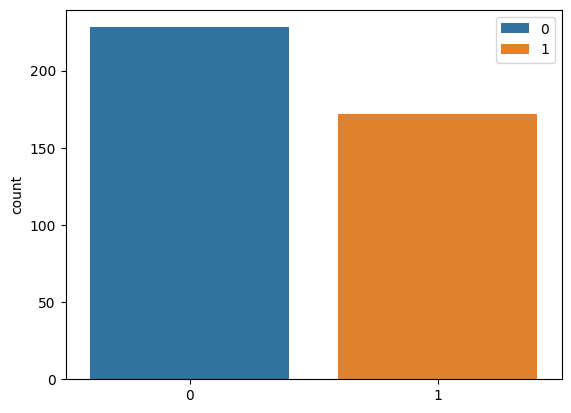

In [13]:
sns.countplot(x=y,hue=y)
plt.xlabel=("Chance of Admit")
plt.show()


In [14]:
y

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,


In [15]:
model_data = DecisionTreeClassifier().fit(x_train, y_train)
model_data

DecisionTreeClassifier()

In [16]:
y_predict=model_data.predict(x_test)
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

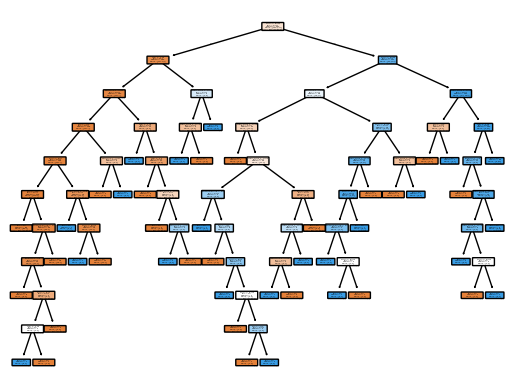

<Figure size 5000x5000 with 0 Axes>

In [17]:
tree.plot_tree(model_data, filled=True, feature_names=x_train.columns, class_names=["Not Admitted(0)", "Admitted(1)"], rounded=True)
plt.figure(figsize=(50,50))
plt.show()

In [18]:
print(model_data.predict([[314,109,4,3.5,4.0,8.77,1]]))
op=model_data.predict([[314,109,4,3.5,4.0,8.77,1]])
if op==1:
    print("Student can be admitted")
else:
    print("Student cannot be admitted ")

[1]
Student can be admitted


In [19]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        59
           1       0.80      0.80      0.80        41

    accuracy                           0.84       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



In [20]:
accuracy_score(y_test,y_predict)

0.84

[Text(0.5298295454545454, 0.9545454545454546, 'x[5] <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]'),
 Text(0.29829545454545453, 0.8636363636363636, 'x[4] <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]'),
 Text(0.4140625, 0.9090909090909092, 'True  '),
 Text(0.21022727272727273, 0.7727272727272727, 'x[0] <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]'),
 Text(0.14772727272727273, 0.6818181818181818, 'x[3] <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]'),
 Text(0.09090909090909091, 0.5909090909090909, 'x[5] <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]'),
 Text(0.045454545454545456, 0.5, 'x[3] <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.022727272727272728, 0.4090909090909091, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(0.06818181818181818, 0.4090909090909091, 'x[2] <= 2.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.045454545454545456, 0.3181818181818182, 'x[6] <= 0.5\ngini = 0.153\nsamples = 12\nvalue

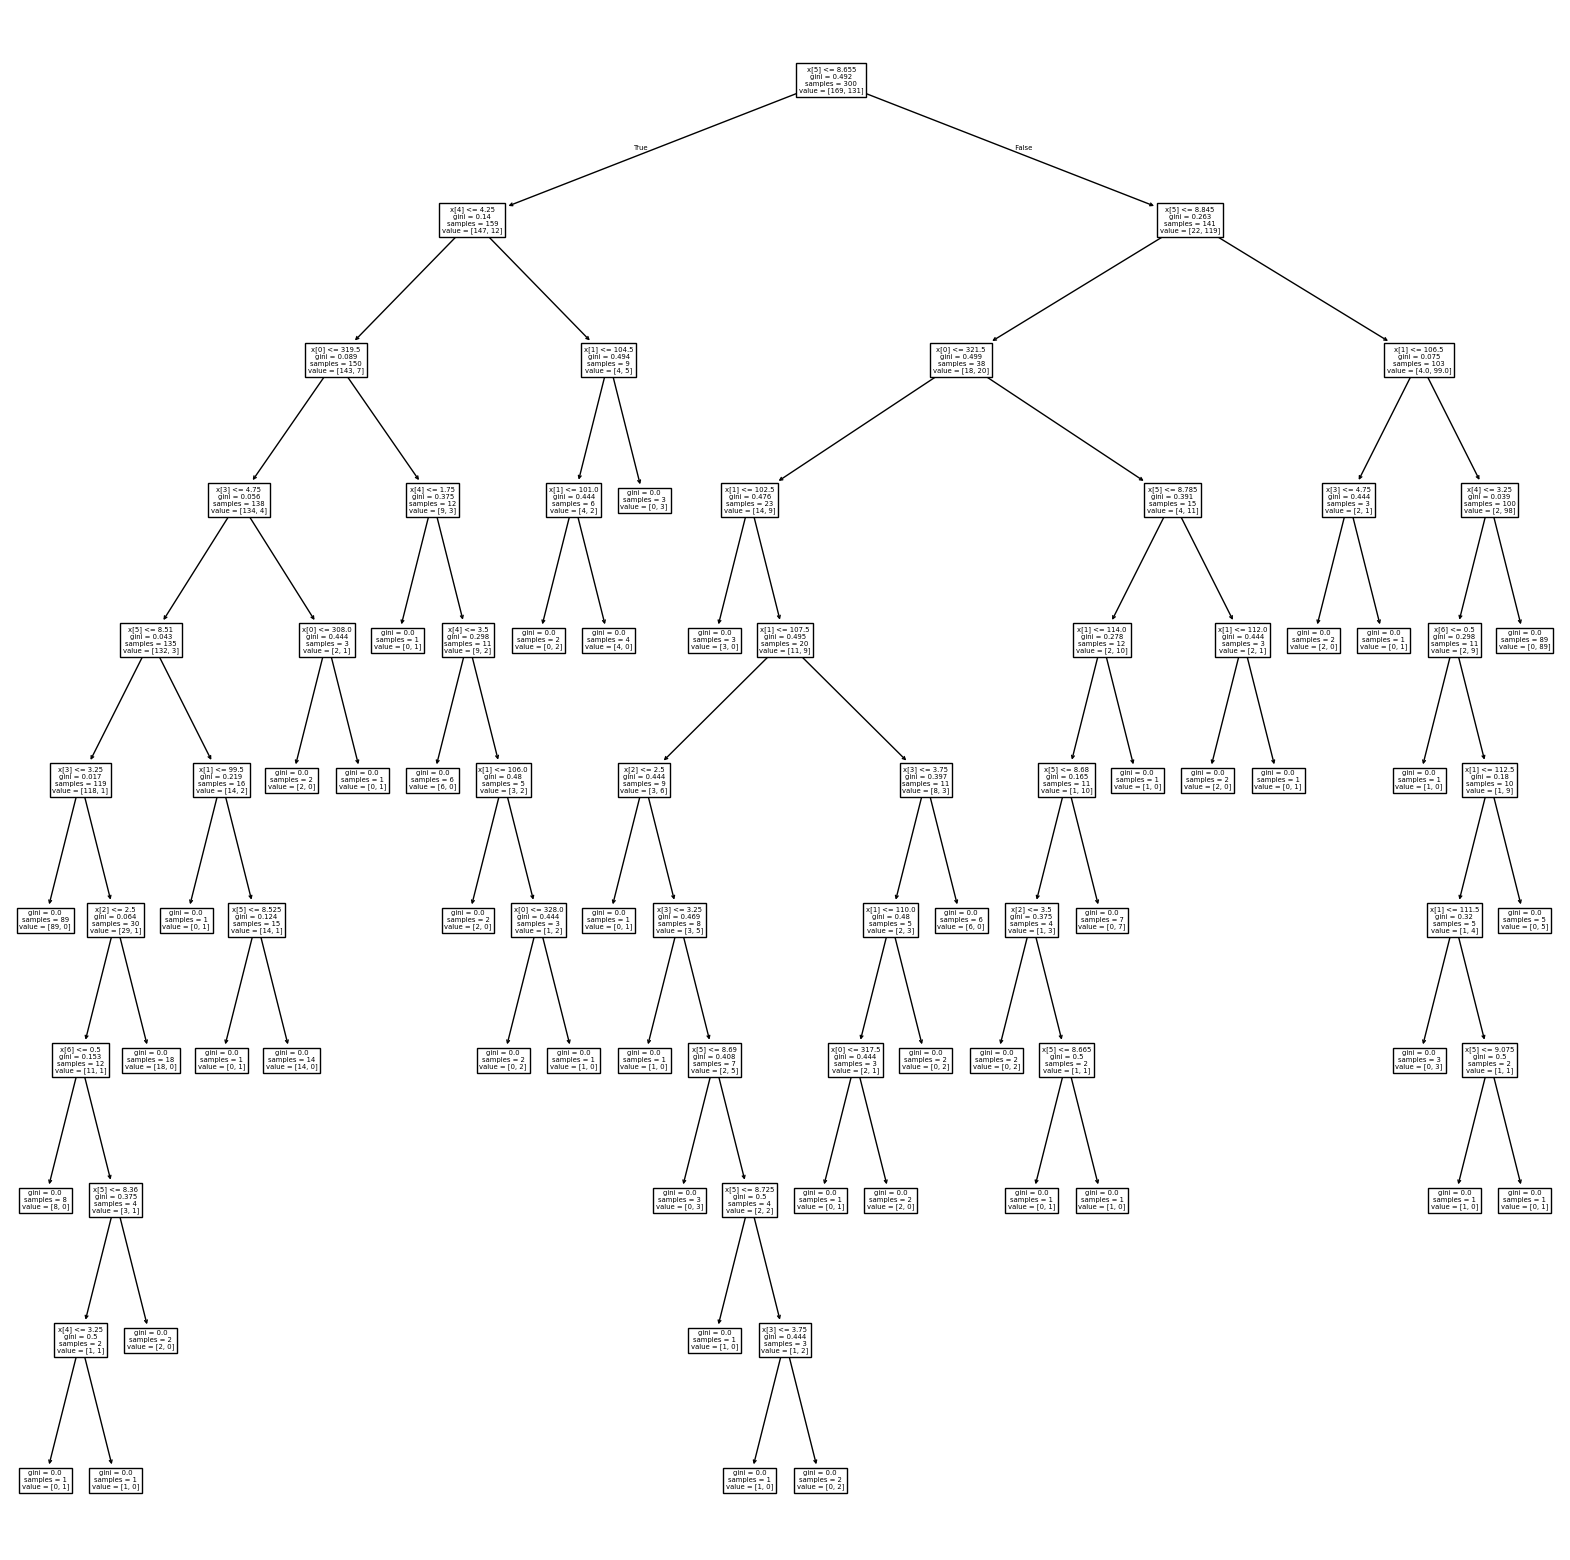

In [21]:
plt.figure(figsize=(20,20))
tree.plot_tree(model_data)

In [22]:
model_entropy=DecisionTreeClassifier(criterion="entropy").fit(x_train,y_train)
model_entropy

DecisionTreeClassifier(criterion='entropy')

In [23]:
y_predictent=model_entropy.predict(x_test)
y_predictent

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [24]:
op_entropy=model_entropy.predict([[305,105,2,3.0,2.0,8.23,0]])
print(op_entropy)
if(op_entropy==0):
    print("Student can be Admitted")
else:
    print("Student cannot be admitted")

[0]
Student can be Admitted


In [25]:
print(classification_report(y_test,y_predictent))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        59
           1       0.81      0.83      0.82        41

    accuracy                           0.85       100
   macro avg       0.84      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [26]:
plt.figure(figsize=(16,16))
tree.plot_tree(model)

NameError: name 'model' is not defined

<Figure size 1600x1600 with 0 Axes>

In [ ]:
for i in range (len(prediction_dt)):
    pred = model_dt.predict(x_test.iloc[[i]])
    if (pred < 1):
        print("Student cannot be admitted.")
    else:
        print("Student can be admitted!!!")

In [ ]:
print(classification_report(y_test,prediction_dt))

In [ ]:
accuracy_score(y_test,prediction_dt)

In [ ]:
sample = x.iloc[[399]]
sample

In [ ]:
sample_prediction_dt = model_dt.predict(sample)
if (sample_prediction_dt < 1):
    print("Student cannot be admitted")
else:
    print("Student can be admitted")

In [ ]:
model_dt_en = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
model_dt_en

In [ ]:
tree.plot_tree(model_dt_en, filled=True, feature_names=x_train.columns, class_names=["Not Admitted(0)", "Admitted(1)"], rounded=True)
plt.show()

In [ ]:
prediction_dt_en= model_dt_e.predict(x_test)
prediction_dt_en

In [ ]:
for i in range (len(prediction_dt_en)):
    pred_e = model_dt_en.predict(x_test.iloc[[i]])
    if (pred_e < 1):
        print("Student cannot be admitted.")
    else:
        print("Student can be admitted!!!")

In [ ]:
print(classification_report(y_test,prediction_dt_en,labels=[ 0, 1]))

In [ ]:
accuracy_score(y_test,prediction_dt_en)

In [ ]:
sample_en = x.iloc[[150]]
sample_en

In [ ]:
sample_prediction_dt_en = model_dt.predict(sample_en)
if (sample_prediction_dt_en < 1):
    print("Student cannot be admitted.")
else:
    print("Student can be admitted")

In [ ]:
sample_2en=x.iloc[[228]]
sample_2en

In [ ]:
sample_prediction_dt_en=model_dt.predict(sample_2en)
if (sample_prediction_dt_en < 1):
    print("Student cannot be admitted")
else:
    print("Student can be admitted")